# Exploratory Data Analysis (EDA)


# 1. Report overview

## 1.1. Project Title: 	**World Women Empowerment: Demystifying Preconceptions About Women's Roles in Society**
### 1.1.1 Subtitle: A Global Analysis of Female Representation in Top Positions and Its Socio-Economic Impact (2004-2022)

![Womem Empowerment](https://png.pngtree.com/background/20220729/original/pngtree-women-empowerment-female-power-community-picture-image_1870427.jpg)

## 1.2. Context:

Women often face stereotypes that directly or indirectly limit their roles to homestaying related jobs, all over the world. Studies show that society expects women to be calm, nurturing, kind, helpful, and supportive — traits often associated with caregiving roles — while traditional men are supposed to be competent, strong, and assertive - qualities generally linked with leadership. Therefore, the characteristics we value in a leader go against societal norms of what it is to be a likable woman. Female leaders will be judge more hasrhly and woman are penalize when they behave in ways that violate gender norms.
This can contribute to discourage women from entering the workforce especially in high-tech fields, and pursuing STEM education, contributing for a bigger gender gap. It is also less likely for a woman to be selected for a top role. As a woman in this society and as a woman in tech, I witness firsthand how male dominance and society steryotypes can negatively influence us.

Addressing these biases is crucial for empowering women all over the world.
    
- As a woman in tech, I want to understand my chances of succeeding in a top role, recognize my value, and understand how impactful we can be in leadership positions.

- As a business leader, I want to understand how gender diversity contributes to and impacts a country performance. When understanding this impact, I aim to promote and create more opportunities for women to join important decision-making positions.

- As a member of the general public, I want to understand the socio-economic implications of women's representation in leadership and the impacts per country on women with STEM education. I aim to combat stereotypes about the role of women in society and advocate for a more inclusive future.

This project uses data from The World Bank Group's Gender Statistics database (2004-2023) to explore these issues. It aims to empower women by highlighting their potential in leadership roles and by persuing STEM education, demonstrating the impact of gender diversity on organizational success, and advocating for societal change towards greater gender equality.


## 1.3. Goal:

In this EDA we are going to focus on the following questions:

- 1 - Which countries have the highest and lowest representation of women in top positions?
- 2 - Is there a correlation between GDP and the percentage of women in top positions?


## 1.4. Dataset used:

https://databank.worldbank.org/reports.aspx?ReportId=153622&Type=Table     World Bank Group's Gender Statistics database (2004-2023)

gender_statistics.csv - 	105 women data related indicators 

# 2. Data Overview

## 2.1. Import libraries


In [1]:
# Standard Data Science Helpers
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Visualization
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

import os
from IPython.display import display, HTML

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

#Warnings
import warnings
warnings.filterwarnings('ignore')


## 2.2. Load data

In [2]:
dataset = pd.read_csv('./DataSet/gender_statistics.csv')
pd.set_option('display.max_columns', None)
dataset.head()

,Time,Country Name,Ratio of female to male labor force participation rate (%) (modeled ILO estimate),"Cost of business start-up procedures, male (% of GNI per capita)","Cost of business start-up procedures, female (% of GNI per capita)",Cost of business start-up procedures (% of GNI per capita),"Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least Master's or equivalent, population 25+, female (%) (cumulative)","Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, Doctoral or equivalent, population 25+, male (%) (cumulative)","Employers, female (% of female employment) (modeled ILO estimate)","Educational attainment, at least Master's or equivalent, population 25+, male (%) (cumulative)","Educational attainment, Doctoral or equivalent, population 25+, female (%) (cumulative)","Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)","Employers, male (% of male employment) (modeled ILO estimate)","Employers, total (% of total employment) (modeled ILO estimate)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)",Expected Years of School,"Expected Years of School, Male","Expected years of schooling, female",Female share of employment in senior and middle management (%),Female professional and technical workers (% of total),"Female share of graduates in Arts and Humanities programmes, tertiary (%)","Female share of graduates from Science, Technology, Engineering and Mathematics (STEM) programmes, tertiary (%)","Female share of graduates in Education programmes, tertiary (%)","Female share of graduates in Health and Welfare programmes, tertiary (%)","Female share of graduates in Natural Sciences, Mathematics and Statistics programmes, tertiary (%)","Female share of graduates in Services programmes, tertiary (%)","Female share of graduates in unknown or unspecified fields, tertiary (%)","Female share of graduates in Agriculture, Forestry, Fisheries and Veterinary programmes, tertiary (%)","Female share of graduates in Business, Administration and Law programmes, tertiary (%)","Female share of graduates in Engineering, Manufacturing and Construction programmes, tertiary (%)","Female share of graduates in Information and Communication Technologies programmes, tertiary (%)","Female share of graduates in other fields than Science, Technology, Engineering and Mathematics programmes, tertiary (%)","Female share of graduates in Social Sciences, Journalism and Information programmes, tertiary (%)",Firms with female participation in ownership (% of firms),Firms with female top manager (% of firms),GDP growth (annual %),GDP per capita (Current US$),GDP (current US$),GDP per capita (constant 2010 US$),Gini index,"GNI per capita, PPP (current international $)","GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)","Government expenditure on education, total (% of GDP)","Gross graduation ratio, tertiary, male (%)","Gross graduation ratio, tertiary, total (%)","Gross graduation ratio, tertiary, female (%)","Human Capital Index (HCI), Female (scale 0-1)",Human Capital Index (HCI) (scale 0-1),"Human Capital Index (HCI), Male (scale 0-1)","Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)","Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)","Labor force, male","Labor force, female","Labor force, female (% of total labor force)","Labor force, total","Labor force with advanced education, female (% of female wo

## 2.3. Get to know the data

### 2.3.1. Columns and Rows

In [3]:
#size
print(dataset.shape)
print(f"rows =  {len(dataset.axes[0])}, columns =  {len(dataset.axes[1])}")

(4345, 105)
rows =  4345, columns =  105


In [4]:
#Get columns and columns' types
dtypes = dataset.dtypes
dtype_counts = dtypes.value_counts()

dtype_counts

float64    103
object       2
Name: count, dtype: int64

In [5]:
# general info:
dataset.describe()

,Ratio of female to male labor force participation rate (%) (modeled ILO estimate),"Cost of business start-up procedures, male (% of GNI per capita)","Cost of business start-up procedures, female (% of GNI per capita)",Cost of business start-up procedures (% of GNI per capita),"Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least Master's or equivalent, population 25+, female (%) (cumulative)","Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, Doctoral or equivalent, population 25+, male (%) (cumulative)","Employers, female (% of female employment) (modeled ILO estimate)","Educational attainment, at least Master's or equivalent, population 25+, male (%) (cumulative)","Educational attainment, Doctoral or equivalent, population 25+, female (%) (cumulative)","Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)","Employers, male (% of male employment) (modeled ILO estimate)","Employers, total (% of total employment) (modeled ILO estimate)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)",Expected Years of School,"Expected Years of School, Male","Expected years of schooling, female",Female share of employment in senior and middle management (%),Female professional and technical workers (% of total),"Female share of graduates in Arts and Humanities programmes, tertiary (%)","Female share of graduates from Science, Technology, Engineering and Mathematics (STEM) programmes, tertiary (%)","Female share of graduates in Education programmes, tertiary (%)","Female share of graduates in Health and Welfare programmes, tertiary (%)","Female share of graduates in Natural Sciences, Mathematics and Statistics programmes, tertiary (%)","Female share of graduates in Services programmes, tertiary (%)","Female share of graduates in unknown or unspecified fields, tertiary (%)","Female share of graduates in Agriculture, Forestry, Fisheries and Veterinary programmes, tertiary (%)","Female share of graduates in Business, Administration and Law programmes, tertiary (%)","Female share of graduates in Engineering, Manufacturing and Construction programmes, tertiary (%)","Female share of graduates in Information and Communication Technologies programmes, tertiary (%)","Female share of graduates in other fields than Science, Technology, Engineering and Mathematics programmes, tertiary (%)","Female share of graduates in Social Sciences, Journalism and Information programmes, tertiary (%)",Firms with female participation in ownership (% of firms),Firms with female top manager (% of firms),GDP growth (annual %),GDP per capita (Current US$),GDP (current US$),GDP per capita (constant 2010 US$),Gini index,"GNI per capita, PPP (current international $)","GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)","Government expenditure on education, total (% of GDP)","Gross graduation ratio, tertiary, male (%)","Gross graduation ratio, tertiary, total (%)","Gross graduation ratio, tertiary, female (%)","Human Capital Index (HCI), Female (scale 0-1)",Human Capital Index (HCI) (scale 0-1),"Human Capital Index (HCI), Male (scale 0-1)","Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)","Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)","Labor force, male","Labor force, female","Labor force, female (% of total labor force)","Labor force, total","Labor force with advanced education, female (% of female working-age populati

In [6]:
@interact
def describe(column=list(dataset.columns)):
    print(dataset[column].describe())

interactive(children=(Dropdown(description='column', options=('Time', 'Country Name', 'Ratio of female to male…

### 2.3.2. NA's per column

In [7]:
#Count all NA columns, i.e, nr of columns whose rows are all null
total_col_onlyNARows = dataset.isna().all().sum()
print(f"Total columns with only null values (all rows are null): {total_col_onlyNARows} - in a total of  {len(dataset.axes[1])} columns")

Total columns with only null values (all rows are null): 0 - in a total of  105 columns


In [8]:
@interact
def show_na_counts_and_total_null_columns(column=dataset.columns):
    # Count NA per column
    na_counts = dataset[column].isna().sum()
    print(f"NA count for column '{column}': {na_counts}")

interactive(children=(Dropdown(description='column', options=('Time', 'Country Name', 'Ratio of female to male…

<function matplotlib.pyplot.show(close=None, block=None)>

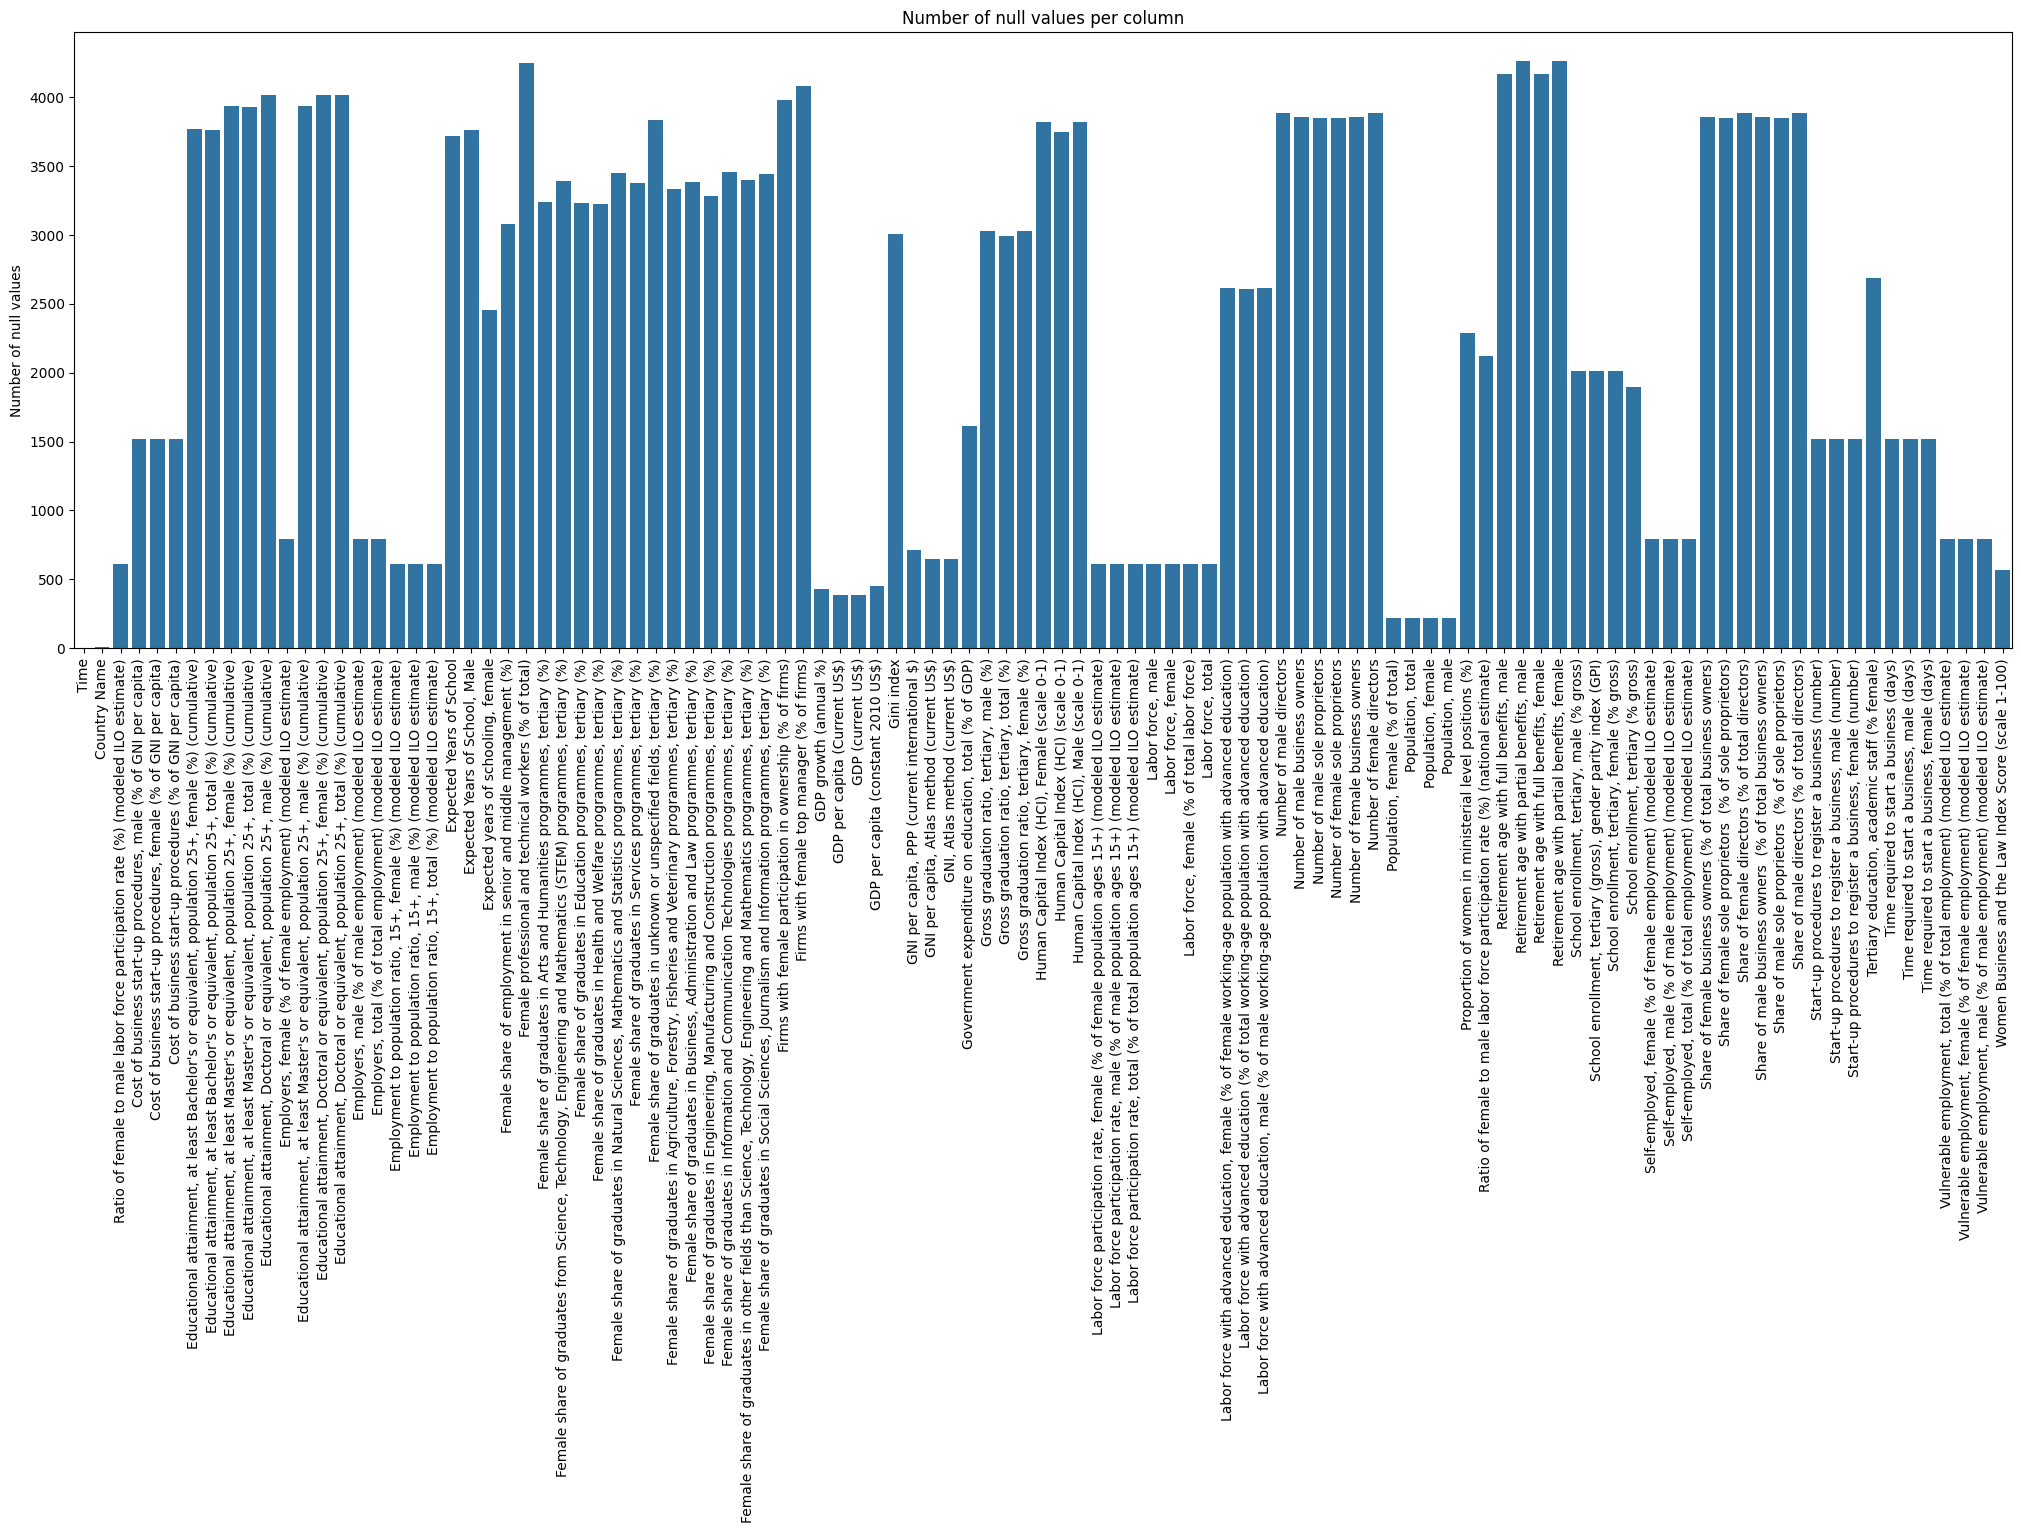

In [9]:
#Histogram of NA'S per column
na_counts = dataset.isna().sum()
na_counts_df = na_counts.reset_index()
na_counts_df.columns = ['Column', 'NA_Counts']

plt.figure(figsize=(25, 8))
barplot_NA_per_column= sns.barplot(data=na_counts_df, x='Column', y='NA_Counts')
plt.xticks(rotation=90);
plt.title('Number of null values per column')
plt.ylabel('Number of null values')
plt.xlabel('')

plt.show


### 2.3.3. NA's per row

In [10]:
#Count all NA rows, i.e, nr of rows whose columns are all NA except the first 2, time and country name
total_rows_onlyNACol = dataset.iloc[:, 2:].isna().all(axis=1).sum()

print(f"Total rows with only null columns (all columns of those rows are null): {total_rows_onlyNACol} - in a total of {len(dataset.axes[0])} rows")

Total rows with only null columns (all columns of those rows are null): 24 - in a total of 4345 rows


In [11]:
#Count NA per row, i.e, nr of NA columns per row - without the first 2 columns, Time and Country Name

na_counts_row = dataset.iloc[:, 2:].isna().sum(axis=1)

@interact
def show_rows_with_na_count_greater_than(x=(5, 104, 1)):
    filtered_rows = dataset[na_counts_row > x]
    total_rows = len(filtered_rows)
    
    display(HTML(f'Total rows with more than {x} NA columns: {total_rows}'))

interactive(children=(IntSlider(value=54, description='x', max=104, min=5), Output()), _dom_classes=('widget-i…

### 2.3.4. Total Years

In [12]:
#Get all years
def is_integer(value):
    try:
        int(value)
        return True
    except ValueError:
        return False

dataset['Time'] = dataset['Time'].dropna().apply(lambda x: int(x) if is_integer(x) else None).astype('Int64')
unique_years = sorted(dataset['Time'].dropna().unique())

print(unique_years)

print(f"This dataset has data since {unique_years[0]} to {unique_years[-1]} - range of {len(unique_years)} years")

[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
This dataset has data since 2004 to 2023 - range of 20 years


### 2.3.5. Total Countries

In [13]:
#Get all countries
count_countries = dataset['Country Name'].value_counts()
print(f"In this dataset there are a total of {len(count_countries)} countries")


In this dataset there are a total of 217 countries


### 2.3.6. NA's columns grouped by year

In [14]:
#Count number NA columns grouped by year (except first 2 columns) - Table
NAPerYear = dataset.groupby('Time').apply(lambda x: x.iloc[:, 2:].isnull().sum())
NAPerYear

,Ratio of female to male labor force participation rate (%) (modeled ILO estimate),"Cost of business start-up procedures, male (% of GNI per capita)","Cost of business start-up procedures, female (% of GNI per capita)",Cost of business start-up procedures (% of GNI per capita),"Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least Master's or equivalent, population 25+, female (%) (cumulative)","Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, Doctoral or equivalent, population 25+, male (%) (cumulative)","Employers, female (% of female employment) (modeled ILO estimate)","Educational attainment, at least Master's or equivalent, population 25+, male (%) (cumulative)","Educational attainment, Doctoral or equivalent, population 25+, female (%) (cumulative)","Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)","Employers, male (% of male employment) (modeled ILO estimate)","Employers, total (% of total employment) (modeled ILO estimate)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)",Expected Years of School,"Expected Years of School, Male","Expected years of schooling, female",Female share of employment in senior and middle management (%),Female professional and technical workers (% of total),"Female share of graduates in Arts and Humanities programmes, tertiary (%)","Female share of graduates from Science, Technology, Engineering and Mathematics (STEM) programmes, tertiary (%)","Female share of graduates in Education programmes, tertiary (%)","Female share of graduates in Health and Welfare programmes, tertiary (%)","Female share of graduates in Natural Sciences, Mathematics and Statistics programmes, tertiary (%)","Female share of graduates in Services programmes, tertiary (%)","Female share of graduates in unknown or unspecified fields, tertiary (%)","Female share of graduates in Agriculture, Forestry, Fisheries and Veterinary programmes, tertiary (%)","Female share of graduates in Business, Administration and Law programmes, tertiary (%)","Female share of graduates in Engineering, Manufacturing and Construction programmes, tertiary (%)","Female share of graduates in Information and Communication Technologies programmes, tertiary (%)","Female share of graduates in other fields than Science, Technology, Engineering and Mathematics programmes, tertiary (%)","Female share of graduates in Social Sciences, Journalism and Information programmes, tertiary (%)",Firms with female participation in ownership (% of firms),Firms with female top manager (% of firms),GDP growth (annual %),GDP per capita (Current US$),GDP (current US$),GDP per capita (constant 2010 US$),Gini index,"GNI per capita, PPP (current international $)","GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)","Government expenditure on education, total (% of GDP)","Gross graduation ratio, tertiary, male (%)","Gross graduation ratio, tertiary, total (%)","Gross graduation ratio, tertiary, female (%)","Human Capital Index (HCI), Female (scale 0-1)",Human Capital Index (HCI) (scale 0-1),"Human Capital Index (HCI), Male (scale 0-1)","Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)","Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)","Labor force, male","Labor force, female","Labor force, female (% of total labor force)","Labor force, total","Labor force with advanced education, female (% of female working-age populati

In [15]:
@interact
def show_na_counts_per_year(year=dataset['Time'].unique()):
    subset = dataset[dataset['Time'] == year]
    
    # Count NA per column (excluding first two columns)
    na_counts_per_column = subset.iloc[:, 2:].isnull().sum()
    
    # Print the results
    print(f"NA counts for year {year}:")
    print(na_counts_per_column)


interactive(children=(Dropdown(description='year', options=(2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 20…

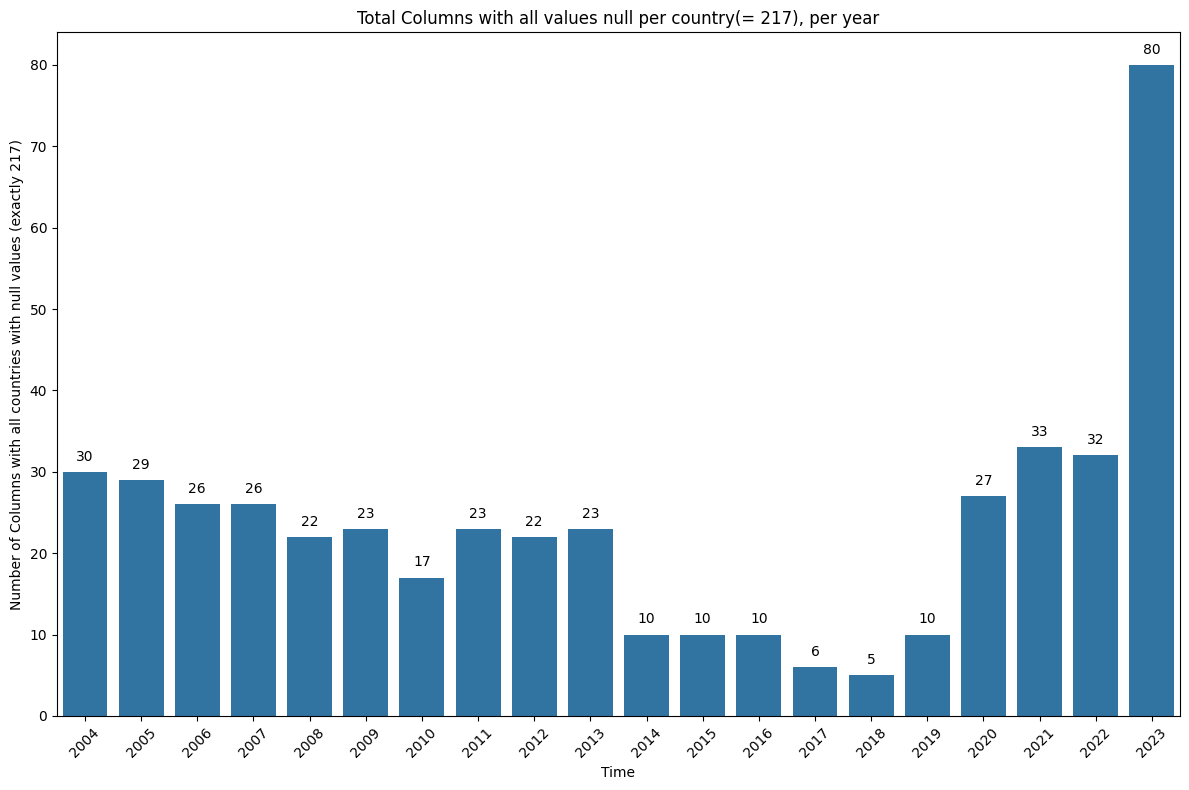

In [16]:
#Histogram of nr of columns with 217 Null Values (=number of countries) grouped by year - Count of all columns that don't have any information for all the countries in the dataset (217)
#except the first 2 columns
na_counts_by_year = dataset.groupby('Time').apply(lambda x: (x.iloc[:, 2:].isnull().sum() == 217).sum())

filtered_years = na_counts_by_year[na_counts_by_year > 0]
na_counts_sorted = filtered_years.sort_index()


plt.figure(figsize=(12, 8))
ax = sns.barplot(x=na_counts_sorted.index, y=na_counts_sorted.values)
plt.ylabel('Number of Columns with all countries with null values (exactly 217)')
plt.title('Total Columns with all values null per country(= 217), per year')
plt.xticks(rotation=45)
plt.tight_layout()

# Bar value
for index, value in enumerate(na_counts_sorted.values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

### 2.3.7. NA's columns grouped by country

In [17]:
#Count number NA columns grouped by Country (except first 2 columns)
pd.reset_option('display.max_rows')
dataset.groupby('Country Name').apply(lambda x: x.iloc[:, 2:].isnull().sum())

,Ratio of female to male labor force participation rate (%) (modeled ILO estimate),"Cost of business start-up procedures, male (% of GNI per capita)","Cost of business start-up procedures, female (% of GNI per capita)",Cost of business start-up procedures (% of GNI per capita),"Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least Master's or equivalent, population 25+, female (%) (cumulative)","Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, Doctoral or equivalent, population 25+, male (%) (cumulative)","Employers, female (% of female employment) (modeled ILO estimate)","Educational attainment, at least Master's or equivalent, population 25+, male (%) (cumulative)","Educational attainment, Doctoral or equivalent, population 25+, female (%) (cumulative)","Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)","Employers, male (% of male employment) (modeled ILO estimate)","Employers, total (% of total employment) (modeled ILO estimate)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)",Expected Years of School,"Expected Years of School, Male","Expected years of schooling, female",Female share of employment in senior and middle management (%),Female professional and technical workers (% of total),"Female share of graduates in Arts and Humanities programmes, tertiary (%)","Female share of graduates from Science, Technology, Engineering and Mathematics (STEM) programmes, tertiary (%)","Female share of graduates in Education programmes, tertiary (%)","Female share of graduates in Health and Welfare programmes, tertiary (%)","Female share of graduates in Natural Sciences, Mathematics and Statistics programmes, tertiary (%)","Female share of graduates in Services programmes, tertiary (%)","Female share of graduates in unknown or unspecified fields, tertiary (%)","Female share of graduates in Agriculture, Forestry, Fisheries and Veterinary programmes, tertiary (%)","Female share of graduates in Business, Administration and Law programmes, tertiary (%)","Female share of graduates in Engineering, Manufacturing and Construction programmes, tertiary (%)","Female share of graduates in Information and Communication Technologies programmes, tertiary (%)","Female share of graduates in other fields than Science, Technology, Engineering and Mathematics programmes, tertiary (%)","Female share of graduates in Social Sciences, Journalism and Information programmes, tertiary (%)",Firms with female participation in ownership (% of firms),Firms with female top manager (% of firms),GDP growth (annual %),GDP per capita (Current US$),GDP (current US$),GDP per capita (constant 2010 US$),Gini index,"GNI per capita, PPP (current international $)","GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)","Government expenditure on education, total (% of GDP)","Gross graduation ratio, tertiary, male (%)","Gross graduation ratio, tertiary, total (%)","Gross graduation ratio, tertiary, female (%)","Human Capital Index (HCI), Female (scale 0-1)",Human Capital Index (HCI) (scale 0-1),"Human Capital Index (HCI), Male (scale 0-1)","Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)","Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)","Labor force, male","Labor force, female","Labor force, female (% of total labor force)","Labor force, total","Labor force with advanced education, female (% of female working-age populati

In [18]:
@interact
def show_na_counts_per_country(country=dataset['Country Name'].unique()):
    subset = dataset[dataset['Country Name'] == country]
    
    # Count NA per column (excluding first two columns)
    na_counts_per_column = subset.iloc[:, 2:].isnull().sum()
    
    # Print the results
    print(f"NA counts for {country}:")
    print(na_counts_per_column)

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'American …

In [19]:
#Countries with columns without values, i.e, with NA values - Countries with all columns that don't have any information for any year - range of 20 years
naAll_counts = dataset.groupby('Country Name').apply(lambda x: (x.iloc[:, 2:].isnull().sum() >= 20).sum())

@interact
def show_na_count(x=(0, 105, 1)):
    filtered_countries = naAll_counts[naAll_counts >= x]
    print(f"20 is the total range of years, which means that {len(filtered_countries)} countries have no data for any year in at least {x} columns")

interactive(children=(IntSlider(value=52, description='x', max=105), Output()), _dom_classes=('widget-interact…

### 2.3.8. Duplicated rows

In [20]:
#Count duplicates
print(f"There are {len(dataset[dataset.duplicated()])} duplicated columns")


There are 4 duplicated columns


## 2.4. Conclusion of this section:

- We have 105 columns and 4345 rows. Of the 105 columns, 103 are type float and 2 are type text (Time and Country Name).

- All columns have at least one value, i.e, there is no columns with all rows with NA values.

- There are a significative number of columns with more than 3000 rows with null values.

- There are 24 rows with all column values null - in a total of 4345 rows. These rows should be deleted from the dataset.

- The range of this dataset is from 2004 to 2023 - total of 20 years.
  
- In 2023 there are 80 columns without data for any country. This year should be deleted and not included in this EDA.

- There are 217 countries in this dataset.

- There are 33 countries with at least 55 columns with no data on it, for any year. We will decide if we delete them after the feature engineering part.

- There are a group of countries that have ',' or '()' characteres in them, which may bring problems if the Country Name is necessary to use. Those Country names should be corrected.

- There are 4  duplicated rows - They are all null and should be deleted.


## 2.5. Insights for next sessions:

- There are a significative number of columns with more than 3000 rows with null values, but this doesn't help with the decision of which columns to select, because it depends on the distribution per country and per year. So, the focus will be on the indicatoes related with the questions that this EDA pretendes to answer. In the Feature Engineering section, it is intended to be created the sub-dataset.

    - __Question 1: Which countries have the highest and lowest representation of women in top positions?__<br>
    - __Question 2: Is there a correlation between GDP and the percentage of women in top positions?__<br>

Indicators:<br>
1 - GDP per capita (Current US) </br>
2 - GDP growth (annual %) </br>
3 - Firms with female top manager (% of firms) <br>
4 - Share of female directors (% of total directors) <br>
5 - Share of female business owners (% of total directors)<br>
5 - Proportion of women in ministerial level positions (%)<br>
6 - Female share of employment in senior and middle management<br>
7 - Employers, female (% of female employment) (modeled ILO estimate)<br>
8 - Population, female (% of total)<br>

- There are 217 countries in this dataset. To facilitate analysis, a new column with region will be created in the Feature Engineering, and 'pycountry' will be used to map each country to its respective region based on the ISO country codes.<br>




# 3. Data Cleaning and Preparation

## 3.1. Data Cleaning

###  3.1.1. Delete rows with only null values

In [21]:
# Drop rows where all values (excluding the first two columns) are null
dataset= dataset.dropna(how='all', subset=dataset.columns[2:])
dataset.reset_index(drop=True, inplace=True)
dataset.shape
# - 24

(4321, 105)

### 3.1.2. Delete all rows from the year 2023

In [22]:
dataset['Time'] = pd.to_numeric(dataset['Time'])
dataset = dataset[dataset['Time'] != 2023]
dataset.reset_index(drop=True, inplace=True)
dataset.shape

(4123, 105)

In [23]:
(dataset['Time'] == 2023).any()

False

### 3.1.3. Correct Country Names

#### - Get Unique Country Names

In [24]:
#Get Unique country names
unique_countries = dataset['Country Name'].unique().tolist()
print(unique_countries)

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana',

#### - Identify country names with problems

In [25]:
#Country names with #characters
misspelled_countries = [
    country for country in unique_countries
    if ',' in country or '(' in country or ' PDR' in country or country == "Viet Nam"
]
misspelled_countries 

['Bahamas, The',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Egypt, Arab Rep.',
 'Gambia, The',
 'Hong Kong SAR, China',
 'Iran, Islamic Rep.',
 "Korea, Dem. People's Rep.",
 'Korea, Rep.',
 'Lao PDR',
 'Macao SAR, China',
 'Micronesia, Fed. Sts.',
 'Sint Maarten (Dutch part)',
 'St. Martin (French part)',
 'Venezuela, RB',
 'Viet Nam',
 'Virgin Islands (U.S.)',
 'Yemen, Rep.']

#### - Replace country names

In [26]:
#Define function

def process_country_name(country_name):
    if country_name == "Congo, Dem. Rep.":
        return "Congo, The Democratic Republic of the"
    elif country_name == "Hong Kong SAR, China":
        return "Hong Kong"
    elif country_name == "Macao SAR, China":
        return "Macao"
    elif country_name == "Korea, Dem. People's Rep.":
        return "North Korea"
    elif country_name == "Korea, Rep.":
        return "South Korea"
    elif country_name == "St. Martin (French part)":
        return "Saint Martin (French part)"
    elif country_name == "Sint Maarten (Dutch part)":
        return "Sint Maarten (Dutch part)"
    elif country_name == "Viet Nam":
        return "Vietnam"
    elif country_name == "Virgin Islands (U.S.)":
        return "Virgin Islands, U.S."
    elif country_name == "West Bank and Gaza":
        return "Palestine"
    elif country_name == "Turkiye":
        return "Türkiye"
    elif country_name == "St. Vincent and the Grenadines":
        return "Saint Vincent and the Grenadines"
    elif country_name == "Cote d'Ivoire":
        return "Côte d'Ivoire"
    elif country_name == "Curacao":
        return "Curaçao"
    
    # Handle second word capitalized cases for SAR or PDR
    if ' ' in country_name:
        words = country_name.split(' ')
        if len(words) > 1 and words[1] in ["SAR", "PDR"]:
            return words[0]

    # General transformations
    if ',' in country_name:
        return country_name.split(',')[0]
    elif '(' in country_name:
        return country_name.split('(')[0].strip()
    return country_name


#Replace names
names = []
for country in dataset['Country Name']:
    name = process_country_name(country)
    names.append(name)


dataset['Country Name'] = names
dataset.reset_index(drop=True, inplace=True)



In [27]:
print(len(dataset['Country Name'].value_counts()))

217


### 3.1.4. Delete duplicated rows

In [28]:
# Remove duplicate rows
dataset = dataset.drop_duplicates()
pd.reset_option('display.max_rows')
print(dataset.shape)

(4123, 105)


## 3.2. Feature Engineering

### 3.2.1 Create Region Column

#### - Import pycountry and extensions

In [29]:
#Import pycountry library
import pycountry
import pycountry_convert
from pycountry_convert import country_name_to_country_alpha2, country_alpha2_to_continent_code, convert_continent_code_to_continent_name

In [30]:
len(pycountry.countries)

249

In [31]:
list(pycountry.countries)[0:5]

[Country(alpha_2='AW', alpha_3='ABW', flag='🇦🇼', name='Aruba', numeric='533'),
 Country(alpha_2='AF', alpha_3='AFG', flag='🇦🇫', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan'),
 Country(alpha_2='AO', alpha_3='AGO', flag='🇦🇴', name='Angola', numeric='024', official_name='Republic of Angola'),
 Country(alpha_2='AI', alpha_3='AIA', flag='🇦🇮', name='Anguilla', numeric='660'),
 Country(alpha_2='AX', alpha_3='ALA', flag='🇦🇽', name='Åland Islands', numeric='248')]

#### - Define convert function

In [32]:
#Convert Country name to alpha2, then alpha 2 to continent_code, then continent_code to continent_name
def country_to_continent(country):
    #country = country.title()
    try:
        # Convert country name to alpha-2 code
        country_alpha2 = country_name_to_country_alpha2(country)


        # Convert alpha-2 code to continent code
        continent_code = country_alpha2_to_continent_code(country_alpha2)

        # Convert continent code to continent name
        continent_name = convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except KeyError:
        return None


#### - Add new column to the dataset

In [33]:
regions = []
for country in dataset['Country Name']:
    region = country_to_continent(country)
    regions.append(region)

dataset['Region'] = regions

print(dataset['Region'].value_counts())
print(f"Number of regions: {len(dataset['Region'].value_counts())}")
print(f"Number of rows with null regions: {dataset['Region'].isnull().sum()}")

Region
Africa           1026
Asia              912
Europe            874
North America     627
Oceania           361
South America     228
Name: count, dtype: int64
Number of regions: 6
Number of rows with null regions: 95


In [34]:
empty_country_rows = dataset[dataset['Region'].isnull() | (dataset['Region'] == "")]
print(empty_country_rows['Country Name'].unique())

print(f" There are still {len(empty_country_rows['Country Name'].value_counts())} countries without region due to a bug in the library pycountry_convert. As they are just a few countries, they can be deleted from the dataset")

['Channel Islands' 'Kosovo' 'Lao' 'Sint Maarten (Dutch part)'
 'Timor-Leste']
 There are still 5 countries without region due to a bug in the library pycountry_convert. As they are just a few countries, they can be deleted from the dataset


### 3.2.2. Delete rows with empty regions

In [35]:
dataset.shape

(4123, 106)

In [36]:
# Drop rows where 'Country Name' is NaN
dataset.dropna(subset=['Region'], inplace=True)

# Reset index after dropping rows
dataset.reset_index(drop=True, inplace=True)
print(dataset.shape)

(4028, 106)


### 3.2.3 Create subset

#### - Subset women_top

In [37]:
col_to_select = ["Time", "Region", "Country Name", 
    "Population, female (% of total)",
    "GDP per capita (Current US$)",
    "GDP growth (annual %)",
    "Employers, female (% of female employment) (modeled ILO estimate)",
    "Female share of employment in senior and middle management (%)",
    "Proportion of women in ministerial level positions (%)",
    "Firms with female top manager (% of firms)",
    "Share of female directors (% of total directors)",
    "Share of female business owners (% of total business owners)",
]

In [38]:
women_top = dataset[col_to_select]

In [39]:
@interact(year=women_top['Time'].unique(), region=women_top['Region'].unique())
def womentopdf_per_year_and_region(year, region):
    filtered_df = women_top[(women_top['Time'] == year) & (women_top['Region'] == region)]
    display(filtered_df.head())

interactive(children=(Dropdown(description='year', options=(2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 20…

#### - Decide which countries to mantain, based on the analysis of this new dataset.

In [40]:
women_top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4028 entries, 0 to 4027
Data columns (total 12 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Time                                                               4028 non-null   Int64  
 1   Region                                                             4028 non-null   object 
 2   Country Name                                                       4028 non-null   object 
 3   Population, female (% of total)                                    4028 non-null   float64
 4   GDP per capita (Current US$)                                       3885 non-null   float64
 5   GDP growth (annual %)                                              3846 non-null   float64
 6   Employers, female (% of female employment) (modeled ILO estimate)  3495 non-null   float64
 7   Female share of employme

In [41]:
col_to_check = [
    "Employers, female (% of female employment) (modeled ILO estimate)",
    "Female share of employment in senior and middle management (%)",
    "Proportion of women in ministerial level positions (%)",
    "Firms with female top manager (% of firms)",
    "Share of female directors (% of total directors)",
    "Share of female business owners (% of total business owners)",
]

In [42]:
#Count values for each column by region
region_value_counts = women_top.groupby('Region')[col_to_check].count()

#Countries per region
region_country_counts = women_top.groupby('Region')['Country Name'].nunique()

#Unique years per country = 19
years_per_country = len(women_top['Time'].unique())

#Total possible values per region for each column
total_possible_values = region_country_counts * years_per_country

#Proportion of non-missing values per region
region_proportions = region_value_counts.div(total_possible_values, axis=0)

region_proportions['Total Proportion Non-Missing'] = region_proportions.mean(axis=1)
region_proportions

,"Employers, female (% of female employment) (modeled ILO estimate)",Female share of employment in senior and middle management (%),Proportion of women in ministerial level positions (%),Firms with female top manager (% of firms),Share of female directors (% of total directors),Share of female business owners (% of total business owners),Total Proportion Non-Missing
Region,,,,,,,
Africa,0.981481,0.126706,0.552632,0.064327,0.115984,0.123782,0.327485
Asia,1.000000,0.301535,0.523026,0.075658,0.183114,0.185307,0.378107
Europe,0.846682,0.630435,0.537757,0.084668,0.138444,0.141876,0.396644
North America,0.636364,0.207337,0.390750,0.038278,0.014354,0.022329,0.218235
Oceania,0.578947,0.119114,0.409972,0.005540,0.049861,0.069252,0.205448
South America,1.000000,0.517544,0.574561,0.087719,0.065789,0.052632,0.383041


In [43]:
@interact(region=region_proportions.index)
def show_region_proportions(region):
    subset = region_proportions.loc[region]
    print(f"Proportions for {region}:")
    print(subset)

interactive(children=(Dropdown(description='region', options=('Africa', 'Asia', 'Europe', 'North America', 'Oc…

In [44]:
@interact(column=region_proportions.columns)
def show_region_proportions_col(column):
    subset = region_proportions[column]
    print(f"Proportions for {column}:")
    print(subset)

interactive(children=(Dropdown(description='column', options=('Employers, female (% of female employment) (mod…

#### Decision for next section EDA Visualization

Total Proportion of Values by Region:</br>
  - After assessing data availability, Asia, Europe, and South America showed similar percentages across all columns.
  - Given the similar data availability, the decision is to compare the indicators by region.
  - If there is lack of data (not enough countries per region, or no data for all years), all the countries will be used. </br>
</br>

# 4. Visualization

## 4.1. Which countries have the highest and lowest representation of women in top positions?

### 4.1.1. Firms with female top manager (% of firms)

In [45]:
#Focusing only in the indicator - Firms with female top manager (% of firms)
fem_top = women_top[["Time","Region", "Country Name","Firms with female top manager (% of firms)"]]
fem_top = fem_top.dropna(subset=["Firms with female top manager (% of firms)"])
fem_top = fem_top.reset_index(drop=True)
print(fem_top.shape)

#Focusing only in the indicator - Female share of employment in senior and middle management (%)
fem_top2 = women_top[["Time","Region", "Country Name", "Female share of employment in senior and middle management (%)"]]
fem_top2 = fem_top2.dropna(subset=["Female share of employment in senior and middle management (%)"])
fem_top2 = fem_top2.reset_index(drop=True)
print(fem_top2.shape)

#Focusing only in the indicator - Share of female directors (% of total directors)
fem_top3 = women_top[["Time","Region", "Country Name", "Share of female directors (% of total directors)"]]
fem_top3 = fem_top3.dropna(subset=["Share of female directors (% of total directors)"])
fem_top3 = fem_top3.reset_index(drop=True)
print(fem_top3.shape)



(255, 4)
(1247, 4)
(449, 4)


#### - Per Country by region

In [46]:
regions = fem_top['Region'].unique().tolist()

# Dropdown widget
region_dropdown = widgets.Dropdown(options=['All'] + regions, value='All', description='Select Region:', disabled=False)

# Line Plot
def line_plot(region=region_dropdown):
    if region == 'All':
        filtered_data = fem_top.copy()
    else:
        filtered_data = fem_top[fem_top['Region'] == region]
    
    
    fig = px.line(filtered_data, x='Time', y='Firms with female top manager (% of firms)', color='Country Name', markers=True, 
                  title=f'Percentage of firms with female Top managers over years in {region if region != "All" else "All Regions"}'
                 )
    
    fig.update_layout(height=1000, xaxis_title='Year', yaxis_title='Percentage (%)')
    fig.show()

display(widgets.interactive(line_plot, region=region_dropdown))

interactive(children=(Dropdown(description='Select Region:', options=('All', 'Asia', 'Europe', 'Africa', 'Sout…

#### - Per Country by Year

In [47]:
years = fem_top['Time'].unique().tolist()

#Always same colors per region:
region_colors = {
    'Africa': 'blue',
    'Asia': 'red',
    'Europe': 'green',
    'Oceania': 'orange',
    'North America': 'purple',
    'South America': 'cyan',
}

#dropdown widget for year
year_dropdown = widgets.Dropdown(options=years,value=years[0], description='Select year:',disabled=False)

def plot_bar(year):
    bar_data = fem_top[fem_top['Time'] == year]
    fig = px.bar(bar_data, x='Country Name', y='Firms with female top manager (% of firms)', color='Region', title=f'Percentage of firms with female top manager in {year}',color_discrete_map=region_colors)
    
    fig.update_layout(yaxis_title='Percentage (%)',xaxis_title="", height = 500)
    fig.show()

display(widgets.interactive(plot_bar, year=year_dropdown))

interactive(children=(Dropdown(description='Select year:', options=(2007, 2008, 2009, 2010, 2011, 2012, 2013, …

#### - Average by region

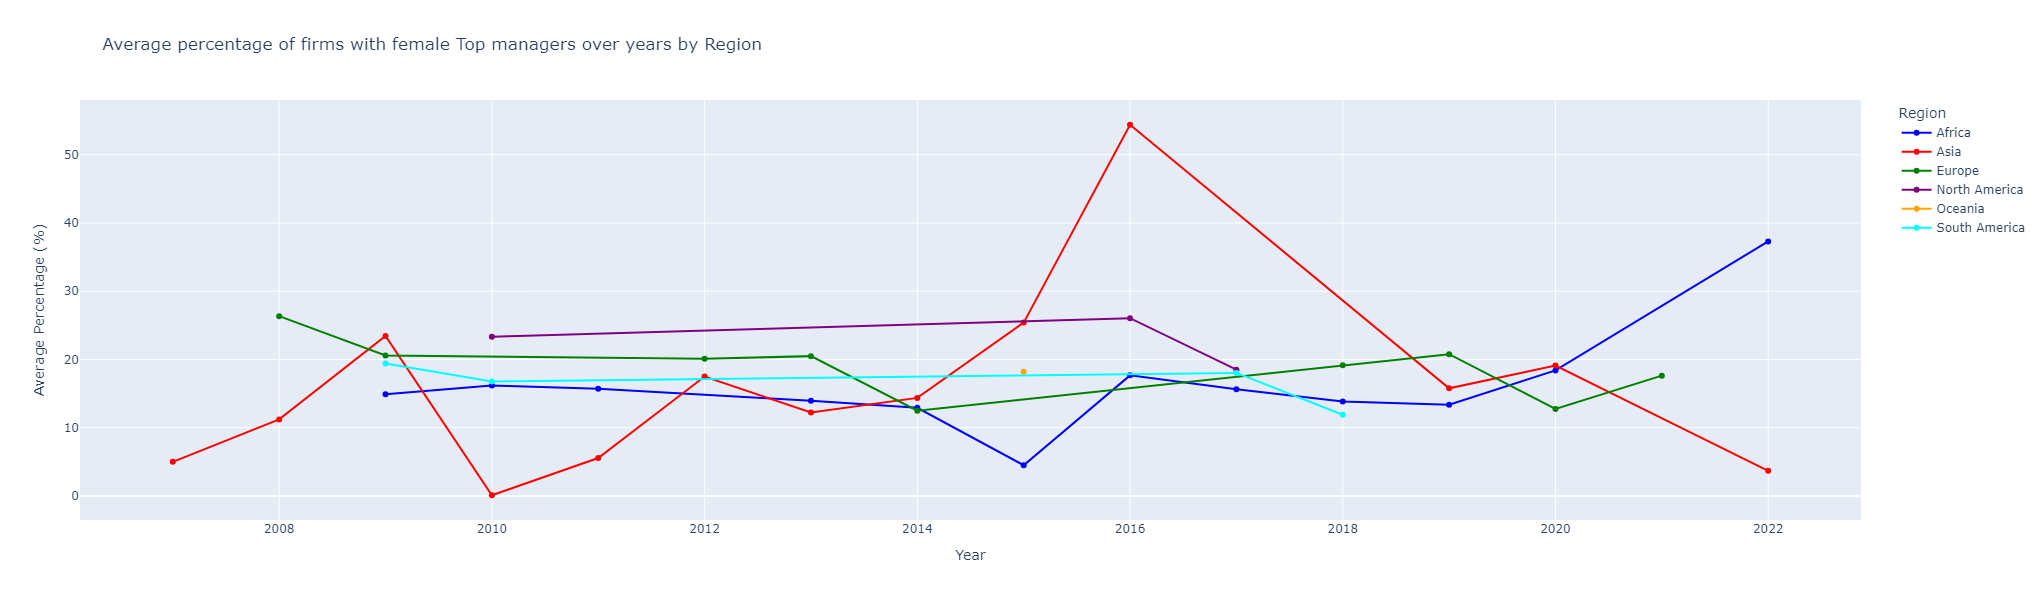

In [48]:
#calculate mean 'Firms with female top manager (% of firms)
aggregated_data1 = fem_top.groupby(['Region', 'Time'])['Firms with female top manager (% of firms)'].mean().reset_index()
fig = px.line(aggregated_data1, x='Time', y='Firms with female top manager (% of firms)', color='Region', line_group='Region', markers=True, title='Average percentage of firms with female Top managers over years by Region',color_discrete_map=region_colors,
              height=600)
fig.update_layout(xaxis_title='Year', yaxis_title='Average Percentage (%)')
fig.show()

### 4.1.2. Female share of employment in senior and middle management (%)

#### - Per Country by Year

In [49]:
years = fem_top2['Time'].unique().tolist()

#dropdown widget for year
year_dropdown = widgets.Dropdown(options=years,value=years[0], description='Select year:',disabled=False)

def plot_bar(year):
    bar_data = fem_top2[fem_top2['Time'] == year]
    fig = px.bar(bar_data, x='Country Name', y='Female share of employment in senior and middle management (%)', color='Region', title=f'Percentage of female employment in senior and middle management in {year}',
                 color_discrete_map=region_colors)
    
    fig.update_layout(yaxis_title='Percentage (%)',xaxis_title="", height = 500)
    fig.show()

display(widgets.interactive(plot_bar, year=year_dropdown))

interactive(children=(Dropdown(description='Select year:', options=(2004, 2005, 2006, 2007, 2008, 2009, 2010, …

#### - Grouped by region

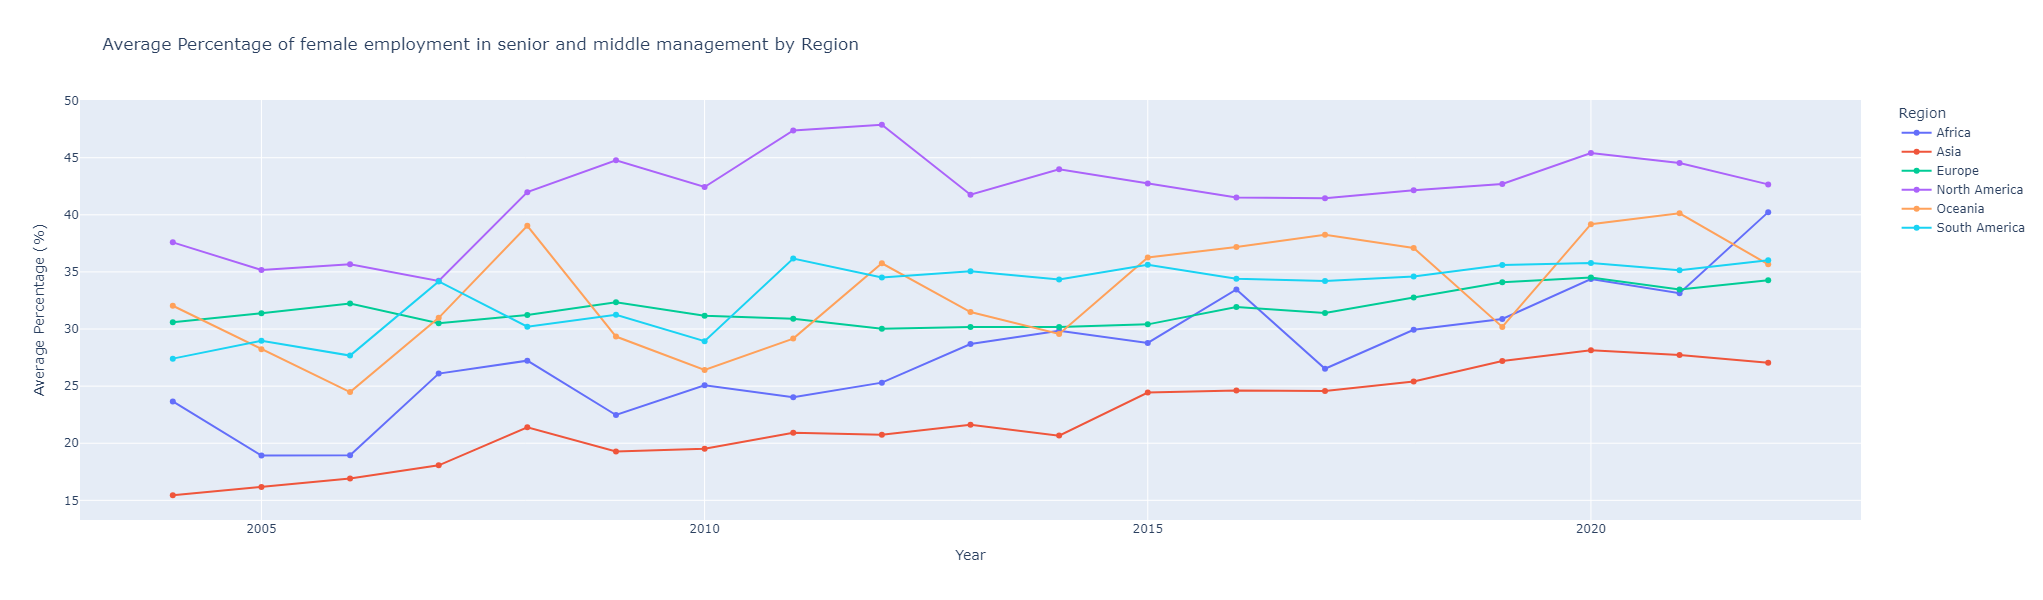

In [50]:
#calculate mean 'Female share of employment in senior and middle management (%)'
aggregated_data2 = fem_top2.groupby(['Region', 'Time'])['Female share of employment in senior and middle management (%)'].mean().reset_index()
fig = px.line(aggregated_data2, x='Time', y='Female share of employment in senior and middle management (%)', color='Region', line_group='Region', markers=True, title='Average Percentage of female employment in senior and middle management by Region',
              height=600)
fig.update_layout(xaxis_title='Year', yaxis_title='Average Percentage (%)')
fig.show()


### 4.1.3. Share of female directors (% of total directors)

#### - Per Country by Year

In [51]:
years = fem_top3['Time'].unique().tolist()

#dropdown widget for year
year_dropdown = widgets.Dropdown(options=years,value=years[0], description='Select year:',disabled=False)

def plot_bar(year):
    bar_data = fem_top3[fem_top3['Time'] == year]
    fig = px.bar(bar_data, x='Country Name', y='Share of female directors (% of total directors)', color='Region', title=f'Percentage of female directors in {year}',
                 color_discrete_map=region_colors)
    fig.update_layout(yaxis_title='Percentage (%)',xaxis_title="", height = 500)
    fig.show()

display(widgets.interactive(plot_bar, year=year_dropdown))

interactive(children=(Dropdown(description='Select year:', options=(2014, 2015, 2016, 2017, 2018, 2019, 2020, …

#### - Average by region

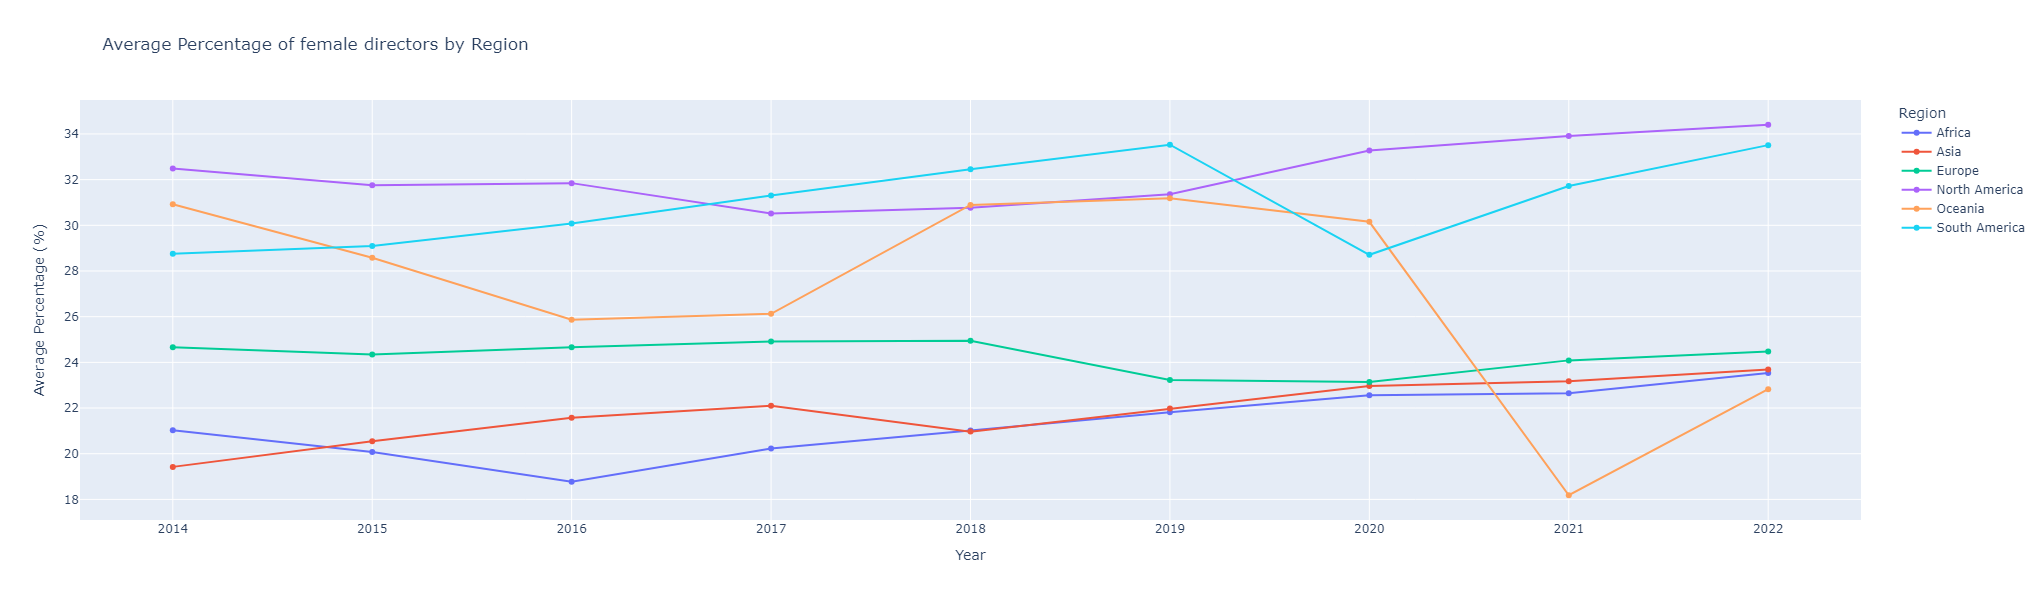

In [52]:
#calculate mean 'Share of female directors (% of total directors)'
aggregated_data3 = fem_top3.groupby(['Region', 'Time'])['Share of female directors (% of total directors)'].mean().reset_index()
fig = px.line(aggregated_data3, x='Time', y='Share of female directors (% of total directors)', color='Region', line_group='Region', markers=True, title='Average Percentage of female directors by Region')
fig.update_layout(xaxis_title='Year', yaxis_title='Average Percentage (%)', height=600)
fig.show()

## 4.2. Is there a correlation between GDP and the percentage of women in top positions?

### 4.2.1. Correlation Matrix

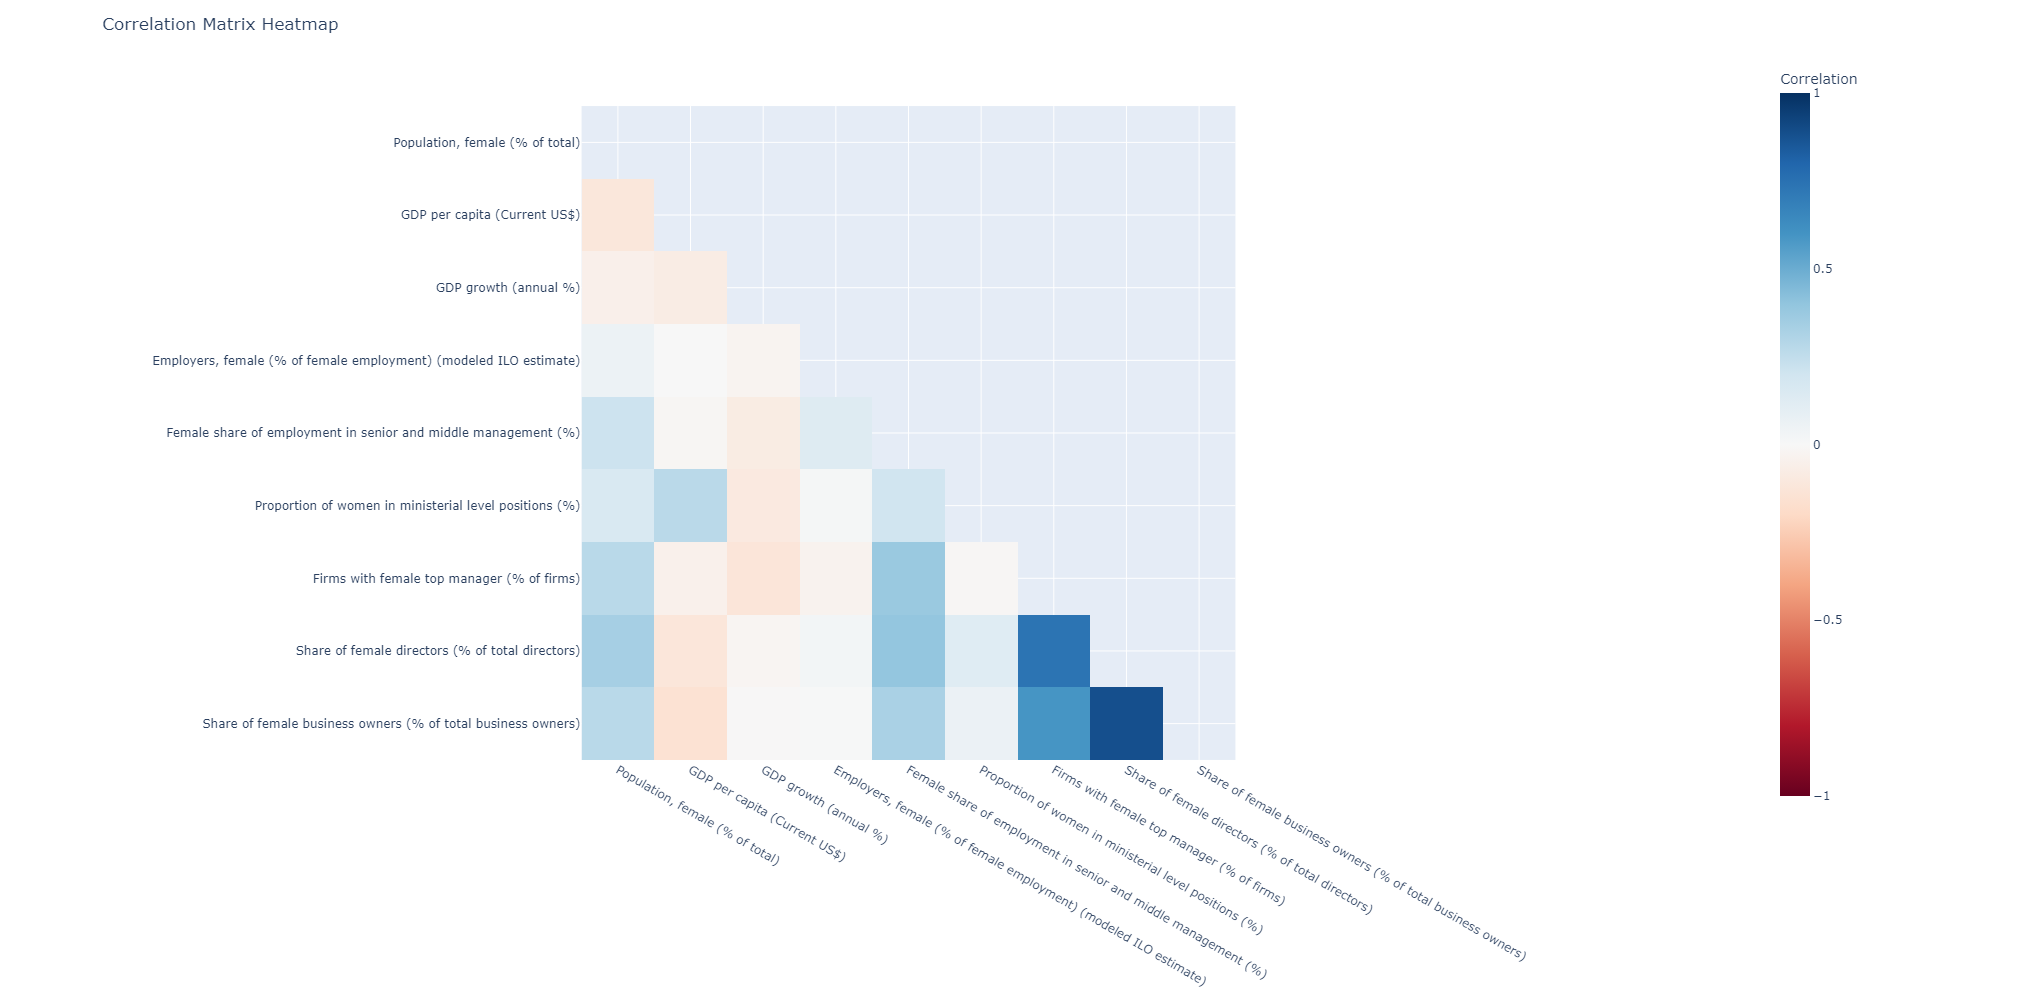

In [77]:
correlation_matrix = women_top.iloc[:, 3:].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
masked_matrix = correlation_matrix.where(~mask)

def plot_heatmap(correlation_matrix, mask):
    fig = px.imshow(masked_matrix,
                    labels=dict(color="Correlation"),
                    x=correlation_matrix.columns,
                    y=correlation_matrix.columns,
                    color_continuous_scale='RdBu',
                    zmin=-1, zmax=1)
    
    fig.update_layout(title='Correlation Matrix Heatmap', width=1400, height=1000)
     
    fig.show()

plot_heatmap(correlation_matrix, masked_matrix)

### 4.2.2. Visual correlation with scatterplots

In [54]:
#Focusing only in the indicators - Firms with female top manager (% of firms)
top_gdp = women_top[["Time","Region", "Country Name","Firms with female top manager (% of firms)","GDP growth (annual %)"]]
top_gdp = top_gdp.dropna(subset=["Firms with female top manager (% of firms)", "GDP growth (annual %)"])
top_gdp = top_gdp.reset_index(drop=True)
print(top_gdp.shape)

#Focusing only in the indicators - Share of female directors (% of total directors)  
top_gdp2 = women_top[["Time","Region", "Country Name","Share of female directors (% of total directors)","GDP growth (annual %)"]]
top_gdp2 = top_gdp2.dropna(subset=["Share of female directors (% of total directors)", "GDP growth (annual %)"])
top_gdp2 = top_gdp2.reset_index(drop=True)
print(top_gdp2.shape)

#Focusing only in the indicators - Proportion of women in ministerial level positions (%)
top_gdp3 = women_top[["Time","Region", "Country Name","Proportion of women in ministerial level positions (%)","GDP growth (annual %)"]]
top_gdp3 = top_gdp3.dropna(subset=["Proportion of women in ministerial level positions (%)", "GDP growth (annual %)"])
top_gdp3 = top_gdp3.reset_index(drop=True)
print(top_gdp3.shape)

#Focusing only in the indicators - Female share of employment in senior and middle management (%)
top_gdp4 = women_top[["Time","Region", "Country Name","Female share of employment in senior and middle management (%)","GDP growth (annual %)"]]
top_gdp4 = top_gdp4.dropna(subset=["Female share of employment in senior and middle management (%)", "GDP growth (annual %)"])
top_gdp4 = top_gdp4.reset_index(drop=True)
print(top_gdp4.shape)

(254, 5)
(448, 5)
(1994, 5)
(1246, 5)


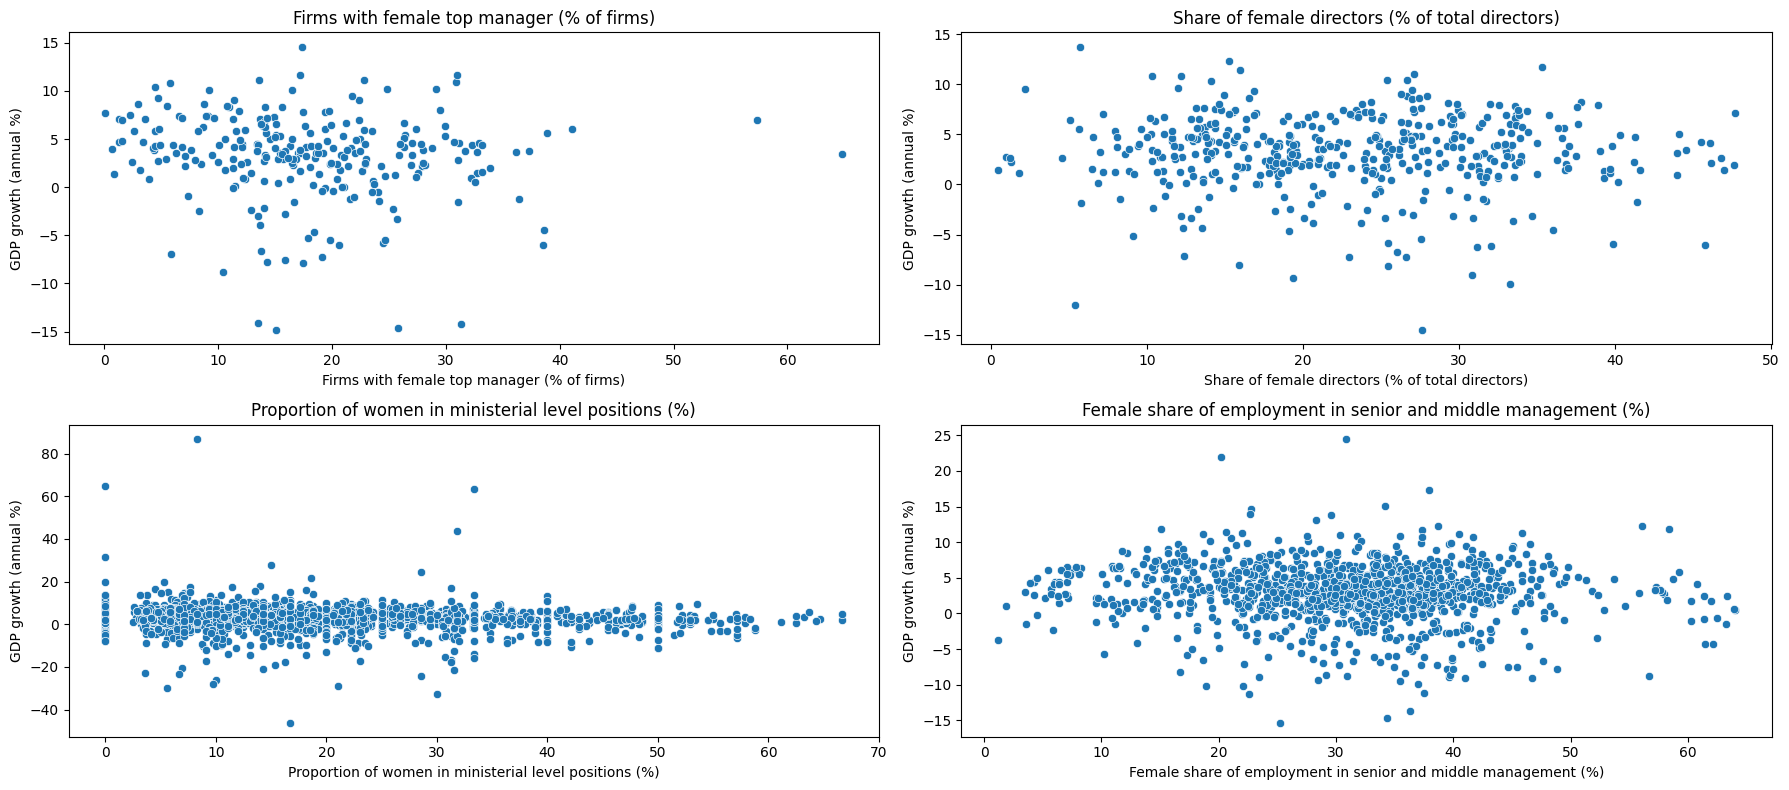

In [55]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 8))

# Scatterplot for Firms with female top manager (% of firms).
sns.scatterplot(x='Firms with female top manager (% of firms)', y='GDP growth (annual %)', data=top_gdp,
                ax=axes[0, 0])
axes[0, 0].set_title('Firms with female top manager (% of firms)')


# Scatterplot for Share of female directors (% of total directors)
sns.scatterplot(x='Share of female directors (% of total directors)', y='GDP growth (annual %)', data=top_gdp2,
                ax=axes[0, 1])
axes[0, 1].set_title('Share of female directors (% of total directors)')


# Scatterplot for Proportion of women in ministerial level positions (%)
sns.scatterplot(x='Proportion of women in ministerial level positions (%)', y='GDP growth (annual %)', data=top_gdp3,
                ax=axes[1, 0])
axes[1, 0].set_title('Proportion of women in ministerial level positions (%)')


# Scatterplot for Female share of employment in senior and middle management (%)
sns.scatterplot(x='Female share of employment in senior and middle management (%)', y='GDP growth (annual %)', data=top_gdp4,
                ax=axes[1, 1])
axes[1, 1].set_title('Female share of employment in senior and middle management (%)')

plt.tight_layout()

### 4.2.3. Pearson correlation coefficient

In [56]:
from scipy.stats import pearsonr
from IPython.display import display, Markdown

correlation, p_value = pearsonr(top_gdp['Firms with female top manager (% of firms)'], top_gdp['GDP growth (annual %)'])
display(Markdown("##### Firms with female top manager (% of firms)"))
print(f"correlation: {correlation},  p_value: {p_value}")


correlation2, p_value2 = pearsonr(top_gdp2['Share of female directors (% of total directors)'], top_gdp2['GDP growth (annual %)'])
display(Markdown("##### Share of female directors (% of total directors)"))
print(f"correlation: {correlation2},  p_value: {p_value2}")


correlation3, p_value3 = pearsonr(top_gdp3['Proportion of women in ministerial level positions (%)'], top_gdp3['GDP growth (annual %)'])
display(Markdown("##### Proportion of women in ministerial level positions (%)"))
print(f"correlation: {correlation3},  p_value: {p_value3}")


correlation4, p_value4 = pearsonr(top_gdp4['Female share of employment in senior and middle management (%)'], top_gdp4['GDP growth (annual %)'])
display(Markdown("##### Female share of employment in senior and middle management (%)"))
print(f"correlation: {correlation4},  p_value: {p_value4}")


##### Firms with female top manager (% of firms)

correlation: -0.12518057664441296,  p_value: 0.046255305085871425


##### Share of female directors (% of total directors)

correlation: -0.021399709141649403,  p_value: 0.651461504076349


##### Proportion of women in ministerial level positions (%)

correlation: -0.09694769293479287,  p_value: 1.446851794808755e-05


##### Female share of employment in senior and middle management (%)

correlation: -0.08200135058643221,  p_value: 0.00377330102130459


In [57]:
#Focusing only in the indicators - Firms with female top manager (% of firms)
top_gdp5 = women_top[["Time","Region", "Country Name","Firms with female top manager (% of firms)","GDP per capita (Current US$)"]]
top_gdp5 = top_gdp5.dropna(subset=["Firms with female top manager (% of firms)", "GDP per capita (Current US$)"])
top_gdp5 = top_gdp5.reset_index(drop=True)
print(top_gdp5.shape)

#Focusing only in the indicators - Share of female directors (% of total directors)  
top_gdp6 = women_top[["Time","Region", "Country Name","Share of female directors (% of total directors)","GDP per capita (Current US$)"]]
top_gdp6 = top_gdp6.dropna(subset=["Share of female directors (% of total directors)", "GDP per capita (Current US$)"])
top_gdp6 = top_gdp6.reset_index(drop=True)
print(top_gdp6.shape)

#Focusing only in the indicators - Proportion of women in ministerial level positions (%)
top_gdp7 = women_top[["Time","Region", "Country Name","Proportion of women in ministerial level positions (%)","GDP per capita (Current US$)"]]
top_gdp7 = top_gdp7.dropna(subset=["Proportion of women in ministerial level positions (%)", "GDP per capita (Current US$)"])
top_gdp7 = top_gdp7.reset_index(drop=True)
print(top_gdp7.shape)

#Focusing only in the indicators - Female share of employment in senior and middle management (%)
top_gdp8 = women_top[["Time","Region", "Country Name","Female share of employment in senior and middle management (%)","GDP per capita (Current US$)"]]
top_gdp8 = top_gdp8.dropna(subset=["Female share of employment in senior and middle management (%)", "GDP per capita (Current US$)"])
top_gdp8 = top_gdp8.reset_index(drop=True)
print(top_gdp8.shape)

(255, 5)
(448, 5)
(2006, 5)
(1246, 5)


In [58]:
from scipy.stats import pearsonr
from IPython.display import display, Markdown

correlation5, p_value5 = pearsonr(top_gdp5['Firms with female top manager (% of firms)'], top_gdp5['GDP per capita (Current US$)'])
display(Markdown("##### Firms with female top manager (% of firms)"))
print(f"correlation: {correlation5},  p_value: {p_value5}")


correlation6, p_value6 = pearsonr(top_gdp6['Share of female directors (% of total directors)'], top_gdp6['GDP per capita (Current US$)'])
display(Markdown("##### Share of female directors (% of total directors)"))
print(f"correlation: {correlation6},  p_value: {p_value6}")


correlation7, p_value7 = pearsonr(top_gdp7['Proportion of women in ministerial level positions (%)'], top_gdp7['GDP per capita (Current US$)'])
display(Markdown("##### Proportion of women in ministerial level positions (%)"))
print(f"correlation: {correlation7},  p_value: {p_value7}")


correlation8, p_value8 = pearsonr(top_gdp8['Female share of employment in senior and middle management (%)'], top_gdp8['GDP per capita (Current US$)'])
display(Markdown("##### Female share of employment in senior and middle management (%)"))
print(f"correlation: {correlation8},  p_value: {p_value8}")


##### Firms with female top manager (% of firms)

correlation: -0.05135071632429644,  p_value: 0.4142054730410115


##### Share of female directors (% of total directors)

correlation: -0.12129468350638099,  p_value: 0.010180245369700237


##### Proportion of women in ministerial level positions (%)

correlation: 0.27286466525088093,  p_value: 1.388717600522313e-35


##### Female share of employment in senior and middle management (%)

correlation: -0.016041957001597447,  p_value: 0.5715782269716466


# 5. Conclusions

## 5.1. Which countries have the highest and lowest representation of women in top positions?

#### - Summary of findings

Based on all the available data from 2007 to 2022, for the indicator "Firm with female top manager (% of firms)":

The country with the highest representation of women in top managerial positions is **Thailand in 2016 with 64.8%**.
The lowest representation was in **Yemen in 2010 with 0.1%**.

Regional Insights:</br>
**Asia**: Highest in Thailand (64.8% in 2016), lowest in Yemen (0.1% in 2010). </br>
**Europe**: Highest in Latvia (33.9% in 2013), lowest in Luxembourg (7.4% in 2020). </br>
**Africa**: Highest in South Africa (38.5% in 2020), lowest in Sudan (3.4% in 2014). </br>
**South America**: Highest in Venezuela (31.1%), lowest in Chile (4.5%) both in 2010. </br>
**North America**: Highest in Saint Vincent and the Grenadines (38.5%), lowest in Dominican Republic (11%) both in 2010. </br>
**Oceania**: Data only for 2015, highest in Solomon Islands (22.6%), lowest in Papua New Guinea (13.8%). </br>
</br>

The average percentages by region illustrate Asia's fluctuation from its lowest in 2010 to its peak in 2016, while other regions showed more stable trends with occasional fluctuations. It's important to note that data completeness varies across regions and years, affecting the overall analysis. </br>
Additionally, while the indicators "Female share of employment in senior and middle management (%)" and "Share of female directors (% of total directors)" provide more comprehensive data, gaps still exist, influencing regional rankings over time. However, from this 2 indicators we can conclude that it is an increasing trend over the years, as all regions shown an increasing line; and we can conclude that Africa and Asia are the regions with less percentage with women directors and women employement in senior and medior management; while North America has the highest average over the years for both indicatores, being close chased by South America. Europe is represented in 3rd place in both indicators.

#### - Interpretation

- With this data it is possible to identify regional disparities, having Asia as an example, as it identifies a great variability with Thailand reaching a high of 64.8% in 2016 but Yemen recording only 0.1% in 2010. This variation represents the inequeal progress in gender equality initiatives within and across countries of the same regions.

- Europe is shown in 3rd/4th place ammong all regions regarding women in managerial positions. Although Europe is defined as a developed continent, this result may be due to the fact that estearn Europe is included in the dataset.

- Countries such as Malaysia and Latvia demonstrate progress with higher percentages of women in top managerial roles, while countries like Yemen and Sudan still face challenges with very low representation. These disparities can be due to socio-economic and cultural factors, influencing women's access to education and, consequently, to leadership positions.

- The variations in the availability of data across years and countries proves the existance of the gaps in gender data. This difficults the monitor of progress of women and the predictions of the benefits. Improving data collection methods and prioritize gender data into national statistical strategies are essential strategies for global gender equality and to retreive important insights usefull to share among business leaders and consequently promote more women in leadership positions.

- Initiatives such as quotas, leadership development programs for women, and policies addressing unconscious bias can be the reasons for a bigger percentage in some countries, as this help accelerate progress towards gender parity in top management. Countries with successful policies in place can serve as models for others looking to increase female representation in leadership roles.

</br>
Sources:</br>
https://blogs.worldbank.org/en/opendata/three-ways-tackle-gender-data-gaps-and-12-countries-embracing-challenge</br>
https://www.spglobal.com/en/research-insights/special-reports/the-importance-of-gender-data-for-market-analysis</br>
https://webapps.ilo.org/infostories/en-GB/Stories/Employment/beyond-the-glass-ceiling#conclusion</br>
https://www.unwomen.org/en/digital-library/publications/2018/12/issue-brief-making-women-and-girls-visible</br>
https://www.weforum.org/publications/global-gender-gap-report-2022/in-full/2-4-gender-gaps-in-leadership-by-industry-and-cohort/</br></br>



## 5.2. Is there a correlation between GDP and the percentage of women in top positions?

#### - Summary of findings

Based on the analysis of the available data, there is no significant correlation between GDP growth and the percentage of women in leadership positions.</br>
The correlations between the four indicators related to women in leadership (firms with female top managers, share of female directors, proportion of women in ministerial level positions, and female share of employment in senior and middle management) and GDP growth, are statistically insignificant, ranging from -0.021 to -0.125 (all 0).</br>
The relation between Firms with female top manager (% of firms) and GDP and Female share of employment in senior and middle management (%) and GDP, registered a a p-value less than 0.05 (0.046 and 0.00), which is considered statistically significant. This means there is enough evidence to conclude that the observed weak  correlation is not due to randomness.talent.

#### - Interpretation

The findings indicate that while gender diversity in leadership positions is important for societal inclusivity and equity, it does not directly influence GDP growth significatively. Other economic, political, and social factors probably have more substantial roles in determining economic performance and growth.

Therefore, public in general interested in promoting gender equality in leadership should consider broader economic and social contexts when formulating strategies. However, addressing systemic barriers to women's in leadership is still crucial for achieving an inclusive economic growth, as well as policies that promote a supportive environments for diverse leadership talent.

</br>
Sources:</br>
https://www.weforum.org/agenda/2023/11/women-government-representation/</br>
https://www.nature.com/articles/s41599-024-03013-5


#### - Recomendations for future studies

Incorporate indicators related to female education rates (available in this data set), particularly in STEM fields, to understand their impact on women's progression into leadership roles and study the correlation with GDP growth rates.